# MicroGrid

    Microgrids are defined as "a cluster of loads, distributed generation units and energy storage systems operated in coordination to reliably supply electricity, connected to the host power system at the distribution level at a single point of connection "the point of common coupling" (PCC)". microgrids can also be completely autonomous and disconnected from the grid (off-grid)

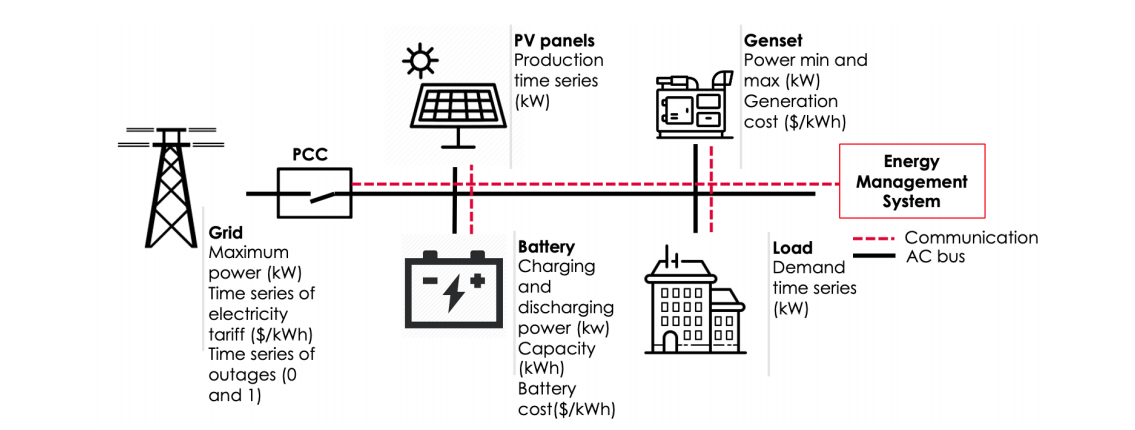

    -Grid: act as infinite source or sink of power from where power can be purchased or sold. 
    -PV Panels: is Photovoltaic / Solar power production its generation are stochastic nature. 
    -Battery: can be used to store power in when excess and use when there is Load
    -Genset: are non renewable energy source(diesel) used based on Load requirement. 
    -Load: power requirement from commercial / household 
    
    *- microgrids are heterogeneous and complex systems, potentially equipped with a wide range of generators and employed in a myriad of applications.
    *- In addition, as load and renewable generation are stochastic, microgrids require advanced metering and adaptative control to maximize their potential.

# PYMGRID

###### pymgrid an open-source python package that serves as a microgrid virtual environment.

pymgrid consists of three main components: 
***
- Data
- Microgrid
- MicrogridGenerator
***
__Data:__
- load and PV production for year long timeseries with a one hour time-step for a total of 8760 points
- from five cities with different climate zone in the US


***
__Micogrid:__
It contains all details of one microgrid
- time series data of load and PV
- specific size of microgrid
- Families of Functions:
    - Control Loop
    - Benchmark algorithms (model predictive control and Rule-based)
    - Utility function
        * run (similar to step in opengym) move forward one time step, it takes as argument a control dictionary and returns the updated state of the microgrid.
        * reset (to reset grid to initial position)
        * train_test_split (for Machine Learning) 

***
__MicrogridGenerator:__ 
Functionality to generate list of microgrids for given number of micorgrid as input.
It has following components:

step 1: selection of Load
1. Max power of load is generated randomly
2. From a load dataset is selected randomly, it is scalled based on Max power load.

step 2: Architecture 
1. PV, Batteries are always present.
2. genset (Yes /No)
3. randomly selects Grid / No grid / weak grid (connected system with frequent outages)
4. if Architecture has grid/week grid then electricity tariff are randomly selected based on commercial tariffs in California and France. 
ex: {'PV': 1, 'battery': 1, 'genset': 0, 'grid': 1}

step 3: 
1. PV penetration 
2. from Data a PV dataset is selected randomly, it is scalled based on PV penetration.

above process is repeated for number of user-requested microgrids

*Generated grid sizes are guaranteed to be larger than the maximum load, and the genset provides enough power to fulfill the peak load. Finally, batteries are capable of delivering power for the equivalent of three to five hours of mean load*

- load files: 5
- PV files: 5
- Tariffs: 2 
- grid:3
- genset: Yes / No
- 5x5x2x3x2 = 300

more than 600 different microgrid – before even considering the number of possible different PV penetration levels.

## Demo

In [1]:
# import MicrogridGenerator 
from pymgrid import MicrogridGenerator

In [2]:
#create microgrid
Microgrid1 = MicrogridGenerator.MicrogridGenerator(nb_microgrid=1)
Microgrid1.generate_microgrid()

,load,cost_loss_load,cost_overgeneration,cost_co2,PV_rated_power,battery_soc_0,battery_power_charge,battery_power_discharge,battery_capacity,battery_efficiency,battery_soc_min,battery_soc_max,battery_cost_cycle,grid_weak,grid_power_import,grid_power_export
0,960,10,1,0.1,969.6,0.2,430,430,1718,0.9,0.2,1,0.02,0,1920,1920


In [3]:
# microgrid data 
Microgrid1.microgrids[0].print_info()

Microgrid parameters


,load,cost_loss_load,cost_overgeneration,cost_co2,PV_rated_power,battery_soc_0,battery_power_charge,battery_power_discharge,battery_capacity,battery_efficiency,battery_soc_min,battery_soc_max,battery_cost_cycle,grid_weak,grid_power_import,grid_power_export
0,960,10,1,0.1,969.6,0.2,430,430,1718,0.9,0.2,1,0.02,0,1920,1920


Architecture:
{'PV': 1, 'battery': 1, 'genset': 0, 'grid': 1}
Actions: 
dict_keys(['load', 'pv_consummed', 'pv_curtailed', 'pv', 'battery_charge', 'battery_discharge', 'grid_import', 'grid_export'])
Control dictionnary:
['load', 'pv_consummed', 'pv_curtailed', 'pv', 'battery_charge', 'battery_discharge', 'grid_import', 'grid_export']
Status: 
dict_keys(['load', 'hour', 'pv', 'battery_soc', 'capa_to_charge', 'capa_to_discharge', 'grid_status', 'grid_co2', 'grid_price_import', 'grid_price_export'])
Has run mpc baseline:
False
Has run rule based baseline:
False


###### Creating microgrid simulator

In [4]:
from pymgrid.Environments.pymgrid_cspla import MicroGridEnv  # to create sim
env = MicroGridEnv({'microgrid': Microgrid1.microgrids[0]})

In [10]:
env.training_reward_smoothing

'sqrt'

In [17]:
from gym.spaces import Box
import numpy as np
Box(low=-1, high=np.float('inf'), shape=(env.observation_space.shape[0],), dtype=np.float)

Box(11,)

In [30]:
env.

TypeError: get_action() missing 1 required positional argument: 'action'

In [27]:
env.action_space

Discrete(5)

In [18]:
help(Box)

Help on class Box in module gym.spaces.box:

class Box(gym.core.Space)
 |  Box(low=None, high=None, shape=None, dtype=None)
 |  
 |  A box in R^n.
 |  I.e., each coordinate is bounded.
 |  
 |  Example usage:
 |  self.action_space = spaces.Box(low=-10, high=10, shape=(1,))
 |  
 |  Method resolution order:
 |      Box
 |      gym.core.Space
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __init__(self, low=None, high=None, shape=None, dtype=None)
 |      Two kinds of valid input:
 |          Box(low=-1.0, high=1.0, shape=(3,4)) # low and high are scalars, and shape is provided
 |          Box(np.array(low=[-1.0,-2.0]), high=np.array([2.0,4.0])) # low and high are arrays of the same shape
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  contains(self, x)
 |      Return boolean specifying if x is a valid
 |      member of this space
 |  
 |  from_jsonable(self, sample_n)
 |      Convert a JSONable data ty

In [11]:
env.resampling_on_reset

False

In [23]:
Microgrid1.microgrids[0]._df_record_cost

{'cost': [71.24122476699392,
  182.58314970832572,
  63.20732261520638,
  5.277443067606014,
  2811.442194697127,
  3107.2921250742293,
  121.24184225604421,
  6431.011967940972,
  6085.716720669878,
  252.378737399273,
  1768.9361686133486,
  2.63409957184364,
  2.8511828779424353,
  2.496257668946743,
  1741.877022348948,
  2890.29492841909,
  5056.174471723872,
  599.9685232076005,
  101.2058721701829,
  219.14135004247674,
  7751.8881774208685,
  169.37791103726198,
  142.0430102426214,
  102.61375372258131,
  2720.027572346849,
  59.97103642075444,
  2346.1614804653495,
  55.157292098516216,
  58.88224918350683,
  74.85741129267197,
  132.70824995345296,
  170.09753374534924,
  291.83625116068714,
  3105.2026554931363,
  183.79102001219556,
  1094.385936840357,
  1144.615854927606,
  3.40540804703398,
  4.211741876813875,
  168.1103703949035,
  4910.585452876719,
  603.982609652961,
  7000.839733256189,
  7294.329205906451,
  7894.2816450494765,
  294.84275516160875,
  218.8090643

In [25]:
env.get_action()

TypeError: get_action() missing 1 required positional argument: 'action'

In [5]:
# self.Ns = len(self.mg._df_record_state.keys())+1
print('Observation State', env.observation_space.shape,
      '\n',Microgrid1.microgrids[0]._df_record_state.keys(),
      '\n This need to be verified')
print('assumed that one extra number in observation state is microgrid number ')

Observation State (11,) 
 dict_keys(['load', 'hour', 'pv', 'battery_soc', 'capa_to_charge', 'capa_to_discharge', 'grid_status', 'grid_co2', 'grid_price_import', 'grid_price_export']) 
 This need to be verified


In [6]:
print('Action State', env.action_space,
      '\n',Microgrid1.microgrids[0].control_dict,)
#       '\n Overall 8 actions are possible but for current microgrid 5 actions are possibel')
#action 0: battery_charge
#action 1: battery_discharge
#action 2: grid_import
#action 3: grid_export

Action State Discrete(5) 
 ['load', 'pv_consummed', 'pv_curtailed', 'pv', 'battery_charge', 'battery_discharge', 'grid_import', 'grid_export']


In [7]:
# Taking action from 0-4
for i in range(5):
    print('action:', i)
    print(env.get_action(i), '\n')

action: 0
{'pv_consummed': 0.0, 'battery_charge': 0, 'battery_discharge': 0, 'grid_import': 0, 'grid_export': 0, 'genset': 0} 

action: 1
{'pv_consummed': 0.0, 'battery_charge': 0, 'battery_discharge': 0, 'grid_import': 299.21667134907335, 'grid_export': 0, 'genset': 0} 

action: 2
{'pv_consummed': 0.0, 'battery_charge': 0, 'battery_discharge': 0, 'grid_import': 299.21667134907335, 'grid_export': 0, 'genset': 0} 

action: 3
{'pv_consummed': 0.0, 'battery_charge': 0, 'battery_discharge': 0, 'grid_import': 0, 'grid_export': 0, 'genset': 0} 

action: 4
{'pv_consummed': 0.0, 'battery_charge': 430, 'battery_discharge': 0, 'grid_import': 729.2166713490733, 'grid_export': 0, 'genset': 0} 



In [31]:
# Running sim for random action 
import random 
res = []
episode_reward = 0
done = False
obs = env.reset()
env.render()
while not done:
#     env.render()
    action = random.choice([0, 1, 2, 3, 4])
    obs, reward, done, info = env.step(action)
    print(env.
    res.append([action, reward])
    episode_reward += reward

print(f"Total Episode reward for microgrid:{episode_reward}")

state: [0.31166667 0.         0.2        0.88888242 0.         1.
 1.         1.         0.         0.         1.        ] reward: 0 info: {}


TypeError: get_action() missing 1 required positional argument: 'action'

###### Bonsai and Pymgrid integration

- Bonsai has created bonsai-gym package to integrate openAI Gym simulators with bonsai
- bonsai-gym integrator code is modified to use pymgrid simulator

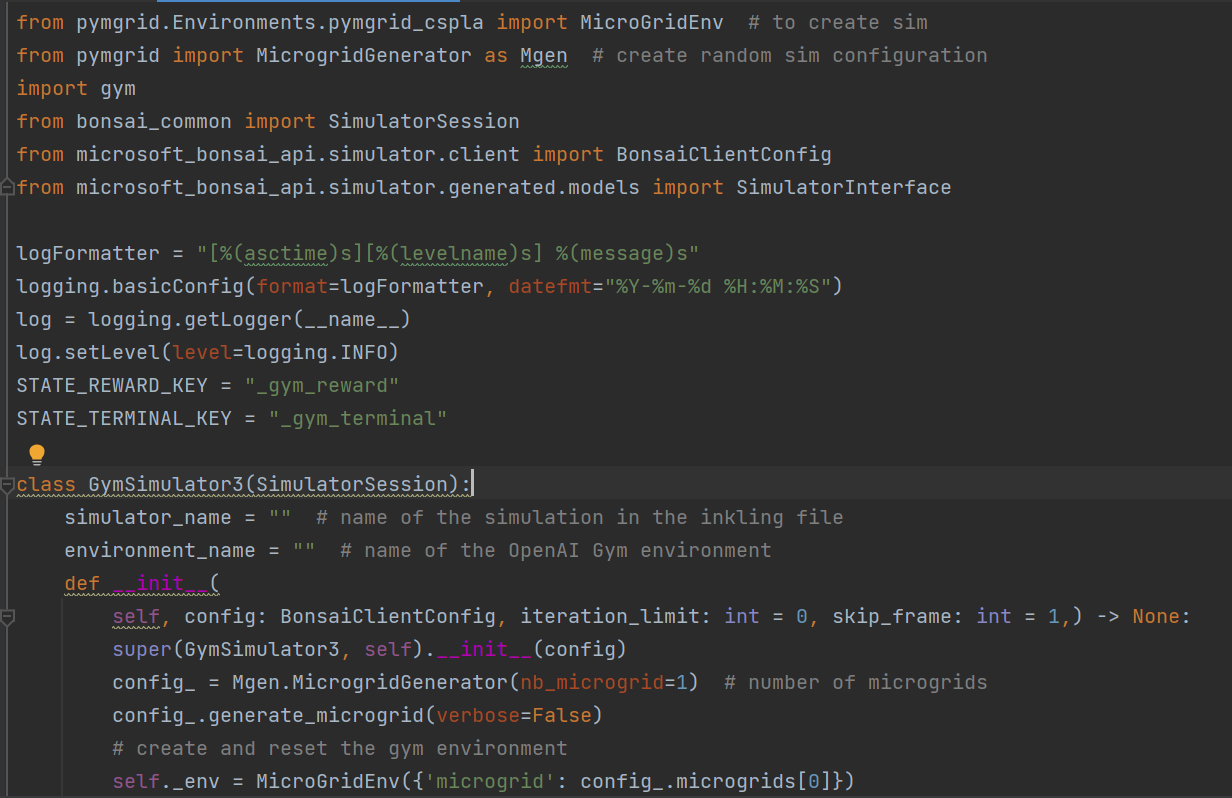

- pymgrid_simulator.py file is created to run simulator using bonsai CLI

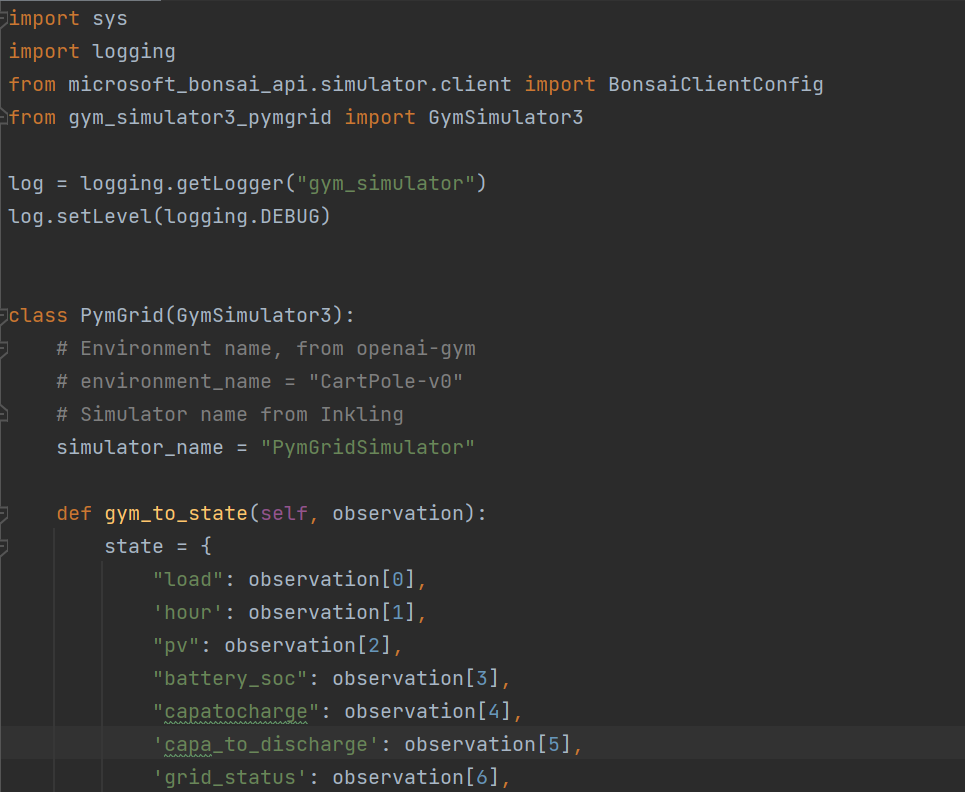

- pymgrid inkling file is created

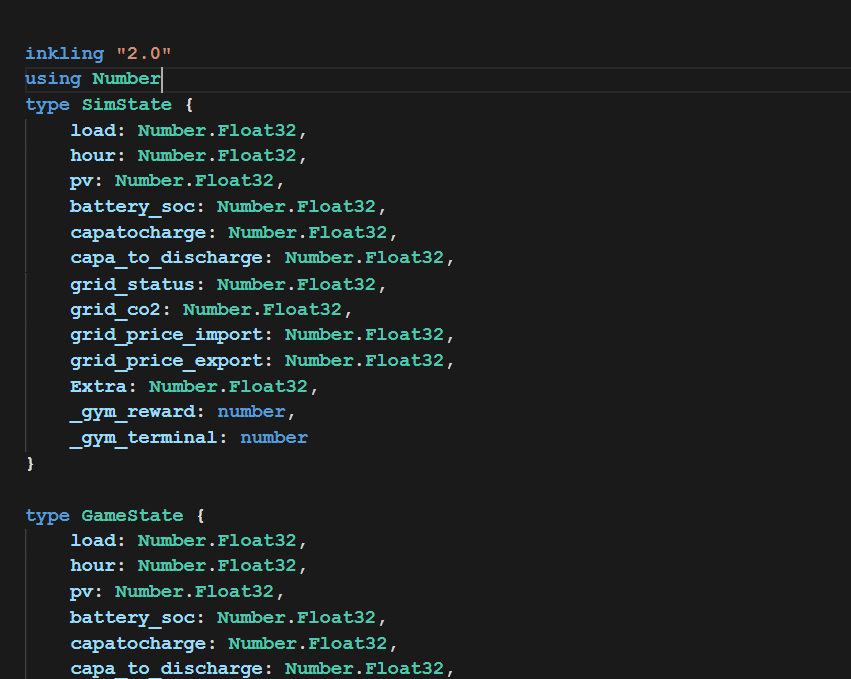

- Using bonsai CLI pymgrid simulator was trined for single microgrid 
- After running 4 episode brain stopped  

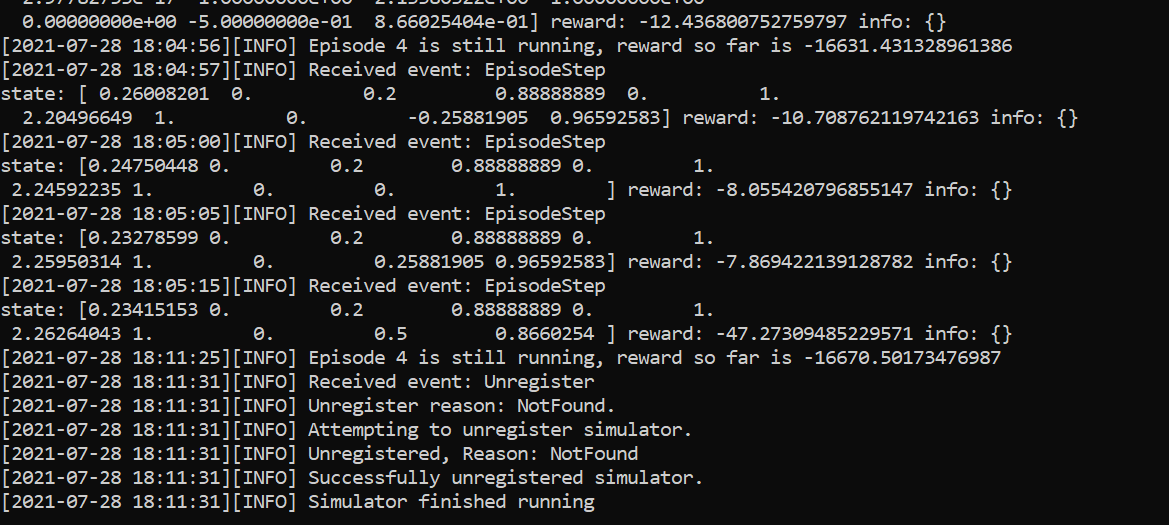